# Integration of 2D elliptic equations

* EC, Feb 2022

### Notions addressed

* Discretization of a 2D elliptic equation 
* Resolution: Gauss methods, relaxation method (SOR)
* Conjugate gradient method

### Problem statement

We start trying to solve this simple problem $P3$:
$$ \frac{\partial^2p}{\partial x^2} + \frac{\partial^2p}{\partial y^2}=  b $$

with $b=0$ in this problem (but the algorithms are given including $b$) and boundaries fixed as:
$$p(x,0) = 10, \quad p(0,y) = 20, \quad p(L_x,y) = 30, \quad p(x, L_y) = 40 $$

$L_x$ ans $L_y$ are the dimensions of the rectangular domain.


## 0. Import useful packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D

## 1. Spatial domain

In [13]:
Lx, Ly = 1, 1.5
Nx, Ny = 41, 51
xdom, ydom = np.linspace(0,Lx,Nx), np.linspace(0,Ly,Ny)
dx, dy = xdom[1]-xdom[0], ydom[1]-ydom[0]
ymesh, xmesh = np.meshgrid(ydom, xdom)

In [14]:
xmesh.shape

(41, 51)

## 2. Resolution

### 2.1 Gauss-Seidel method

In 2D, the Gauss-Seidel iterations are implemented as:

$$ p_{i,j}^{k+1}~ =~ \frac{1}{2(\alpha+\beta)}~ \left[ ~\alpha ~ (p_{i+1,j}^{k}+p_{i-1,j}^{k+1}) ~ +~ \beta ~(p_{i,j+1}^{k}+p_{i,j-1}^{k+1})~ - ~ b_{i,j} ~\right] $$

In [15]:
# Formulate Gauss-Seidel
pr = np.zeros_like(xmesh)
px0, p0y, pLxy, pxLy = 10, 20, 30, 40
forcing = np.zeros_like(xmesh)

kmax, k = 1000, 0
eps, err = 1e-6, 10
alpha, beta = 1/(dx*dx), 1/(dy*dy)

while (k<kmax) and (err>eps):
    pr_tmp = np.copy(pr)
    pr[:,0], pr[0,:], pr[-1,:], pr[:,-1] = px0, p0y, pLxy, pxLy
    for i in range(1, Nx-1):
        for j in range(1, Ny-1):
            pr[i,j] = ( alpha * ( pr[i-1,j] + pr[i+1,j] ) \
                      +  beta * ( pr[i,j-1] + pr[i,j+1] ) \
                      - forcing[i,j] ) / ( 2 * (alpha+beta) )
    err = np.sqrt( np.mean( np.square(pr-pr_tmp) ) )
    k += 1

print(("iterations: ", k))
print(("error: ", err))

('iterations: ', 1000)
('error: ', 0.0005534407609393269)


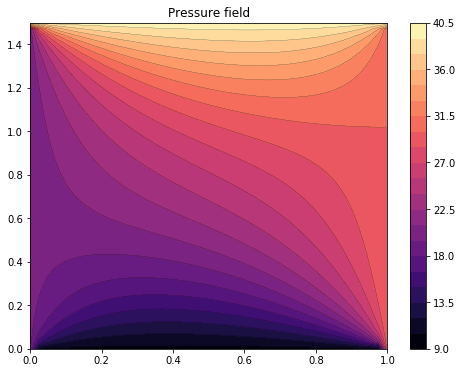

In [16]:
fig = plt.figure(figsize=(8, 6))

#vmin, vmax = -1, 1
plt.contour(xmesh, ymesh, pr, 20, colors='black', linewidths = 0.2)
plt.contourf(xmesh, ymesh, pr, 20, cmap = "magma")
plt.title("Pressure field")
plt.colorbar()


### 2.2 SOR method

In 2D, the SOR iterations are implemented as:

$$ p_{i,j}^{k+1}~ =~ (1-\omega)~ p_{i,j}^{k}~+ ~\frac{\omega}{2(\alpha+\beta)}~ \left[ ~\alpha ~ (p_{i+1,j}^{k}+p_{i-1,j}^{k+1}) ~ +~ \beta ~(p_{i,j+1}^{k}+p_{i,j-1}^{k+1})~ - ~ b_{i,j} ~\right] $$

Parameter $\omega$ is the relaxation factor. Iterations are unstable if $\omega>2$. When $1<\omega<2$, this is over-relaxation. When $0<\omega<1$, this is under-relaxation. If $\omega=1$, this is the Gauss-Seidel method.

In [17]:
# Formulate SOR

# Formulate Gauss-Seidel
pr = np.zeros_like(xmesh)
px0, p0y, pLxy, pxLy = 10, 20, 30, 40
forcing = np.zeros_like(xmesh)

kmax, k = 1000, 0
eps, err = 1e-6, 10
omega = 1.8   # Over-relaxation for 1<omega<2
alpha, beta = 1/(dx*dx), 1/(dy*dy)

while (k<kmax) and (err>eps):
    pr_tmp = np.copy(pr)
    pr[:,0], pr[0,:], pr[-1,:], pr[:,-1] = px0, p0y, pLxy, pxLy
    for i in range(1, Nx-1):
        for j in range(1, Ny-1):
            pr[i,j] = (1 - omega ) * pr[i,j] \
                    + ( alpha * ( pr[i-1,j] + pr[i+1,j] ) \
                      +  beta * ( pr[i,j-1] + pr[i,j+1] ) \
                      - forcing[i,j] ) * omega / ( 2 * (alpha+beta) )
    err = np.sqrt( np.mean( np.square(pr-pr_tmp) ) )
    k += 1

print(("iterations: ", k))
print(("error: ", err))

('iterations: ', 270)
('error: ', 9.65600842517992e-07)


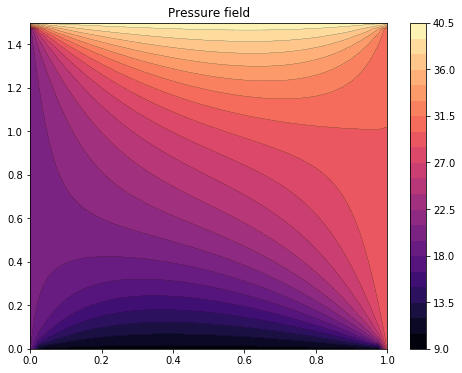

In [18]:
fig = plt.figure(figsize=(8, 6))

#vmin, vmax = -1, 1
plt.contour(xmesh, ymesh, pr, 20, colors='black', linewidths = 0.2)
plt.contourf(xmesh, ymesh, pr, 20, cmap = "magma")
plt.title("Pressure field")
plt.colorbar()